## Overview
Plot graph for check normality, variance equality, sample independence, and numerical data validity for ANOVA.

### Objective
### Preliminary Analysis
**1. Distribution (Normality)**
- 1.1 Histrogram
- 1.2 Barpolt
- 1.3 Shapiro-Wilk Test: We’ll use the **Shapiro-Wilk Test** to test for normality in the data distribution for each age group and plan type **(PlanType)**. The test results will indicate whether **p-value > 0.05**, which signifies that the data follows a normal distribution.

**2. Homogeneity of Variance**
- Use **Levene’s Test** to examine the equality of variances across groups, checking whether **p-value > 0.05**.
- If the p-value is greater than 0.05, it indicates that the variances are equal among the groups.

**3. Data Characteristics (Numerical Data)**
- Verify that **Copayment** is a **numerical variable** suitable for conducting an **ANOVA** test.

### 1. Loading and inspecting dataset
#### import library
1. pandas that it allows you to create, manipulate, and analyze datasets efficiently.
2. numpy that it provides support for arrays, matrices, and various mathematical functions.
3. seaborn that it provides high-level functions to create attractive and informative plots.
4. matplotlib is a foundational library for creating static, interactive, and animated visualizations.
5. scipy.stats for a variety of statistical tests such as t-tests, ANOVA, and probability calculations.
6. statsmodels.stats.weightstats used for hypothesis testing, such as z-tests and t-tests, where the weight of the data is taken into account.
7. To check the equality of variances between different groups.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats import weightstats as stests
from scipy.stats import levene

   Unnamed: 0 AgeGroup  Age   PlanType  Copayment
0           0     0-20   20        PPO          0
1         658     0-20   20        PPO          0
2         659     0-20   20  Indemnity          0
3         660     0-20   20        PPO          0
4         661     0-20   20        EPO         12


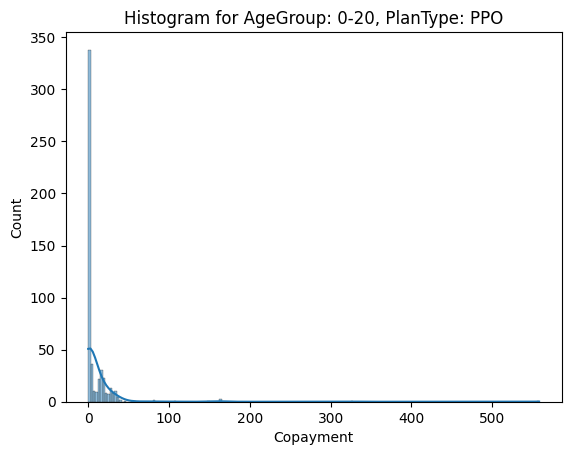

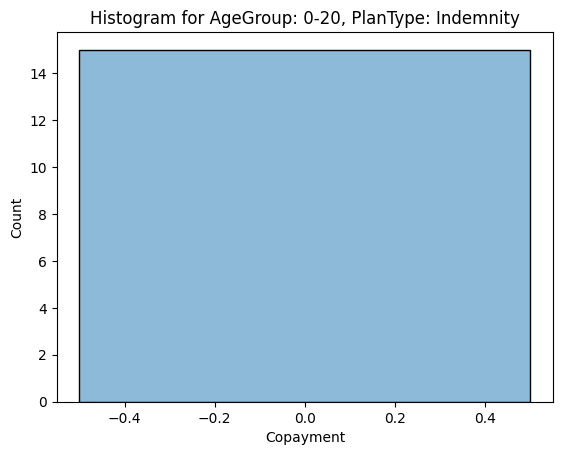

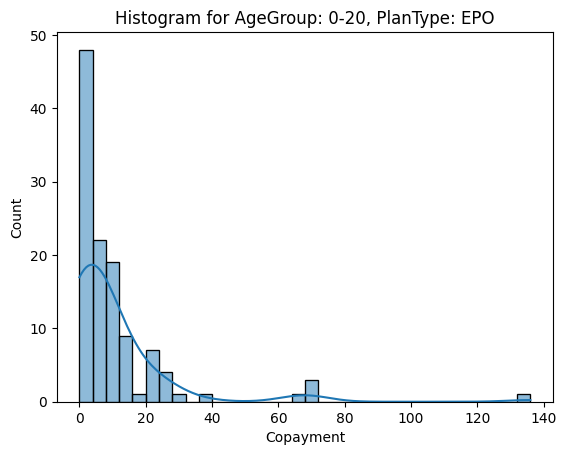

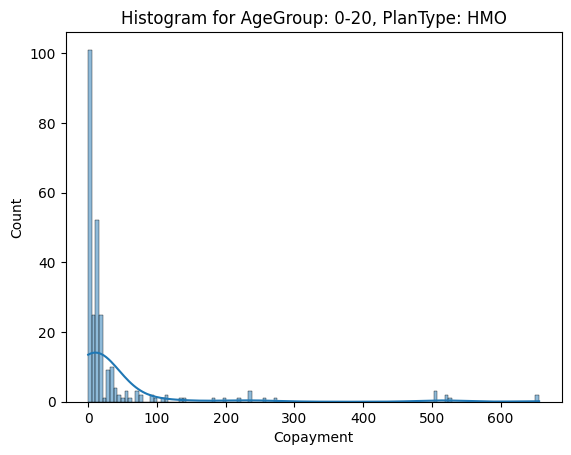

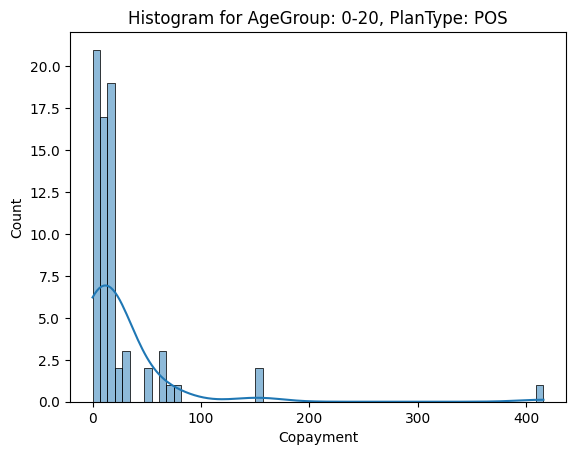

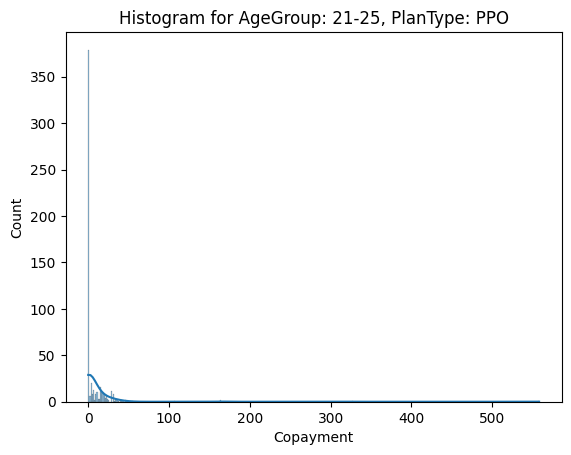

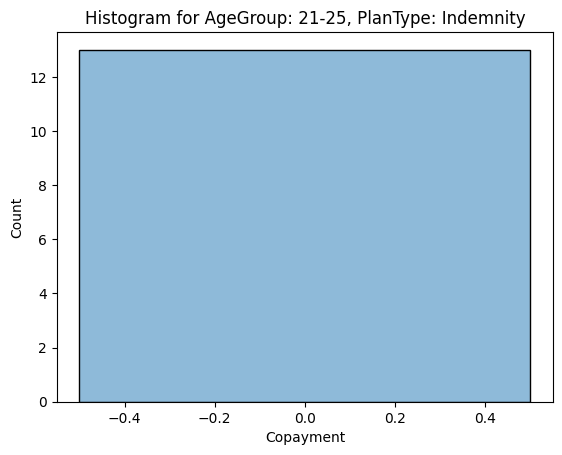

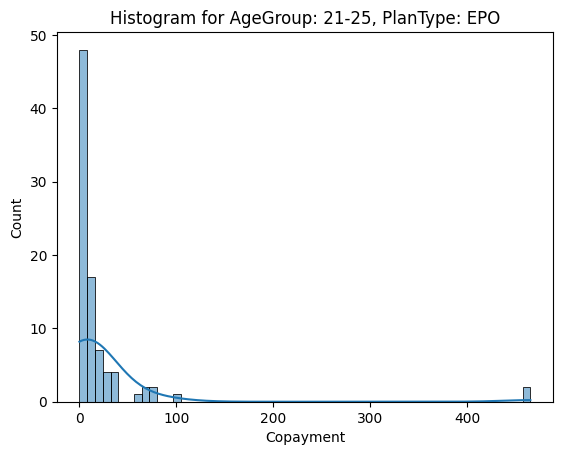

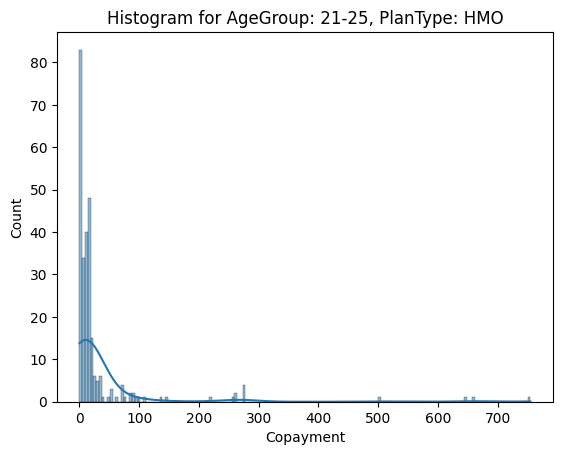

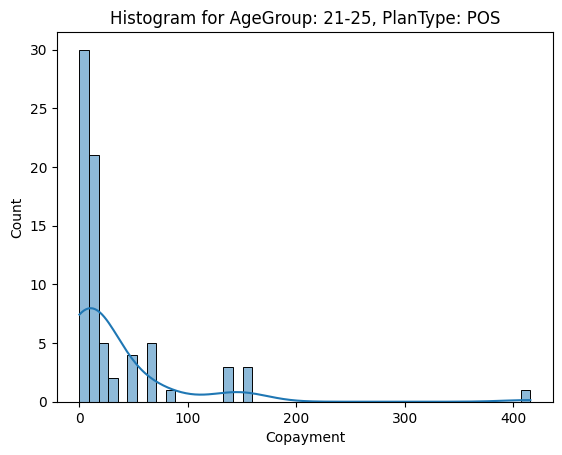

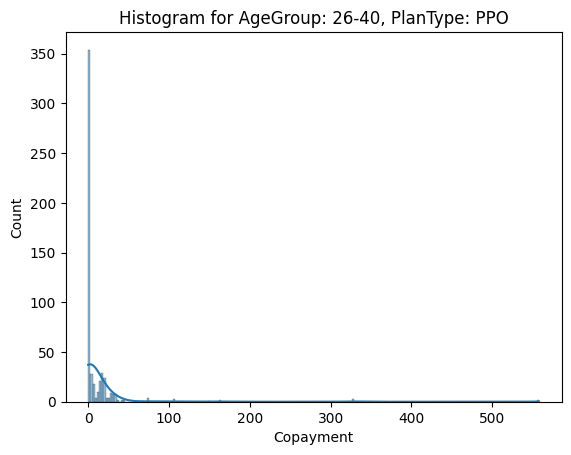

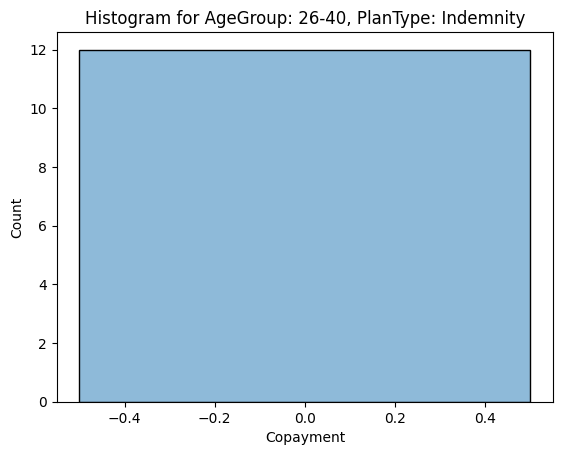

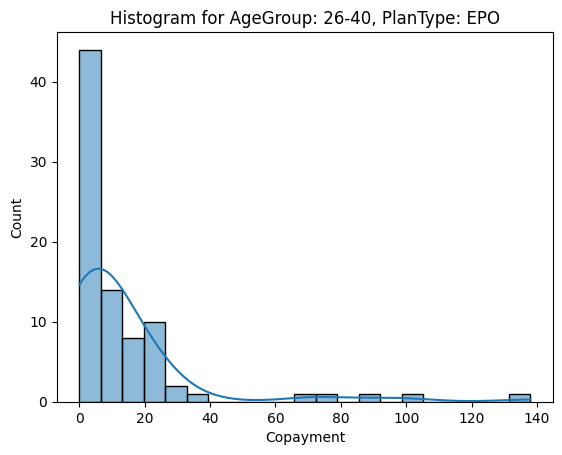

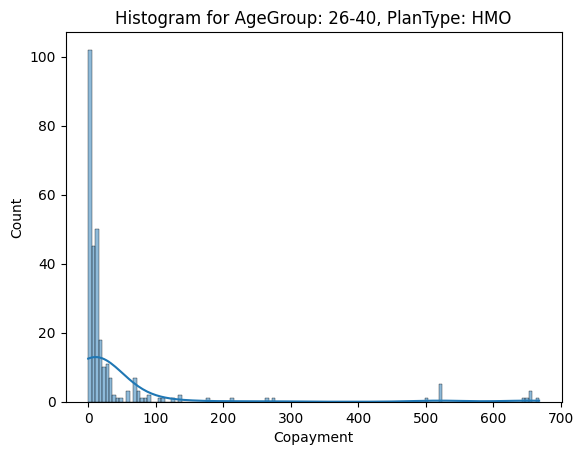

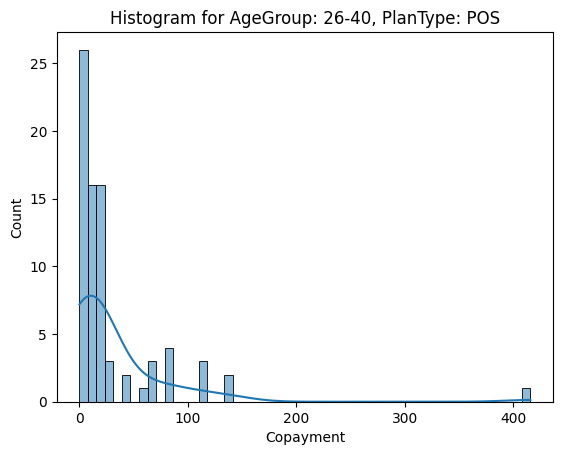

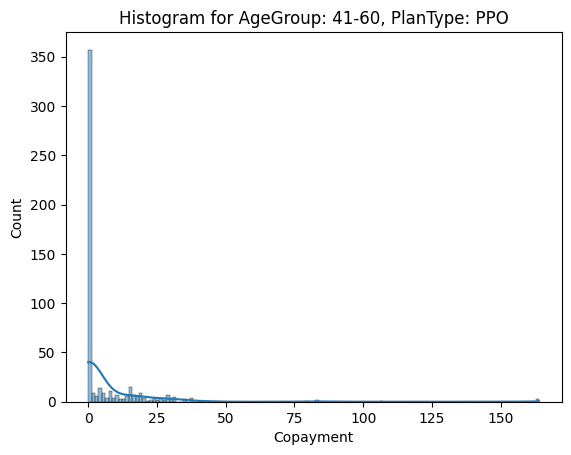

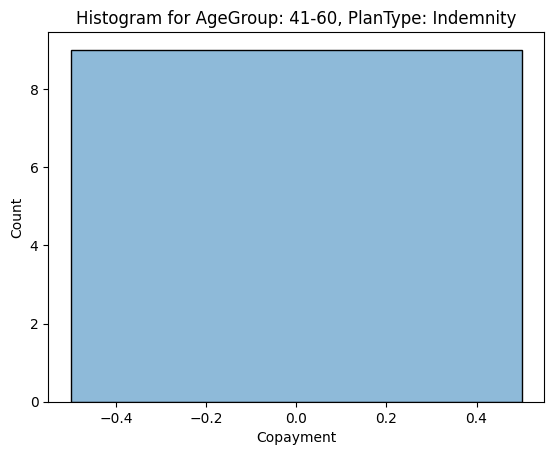

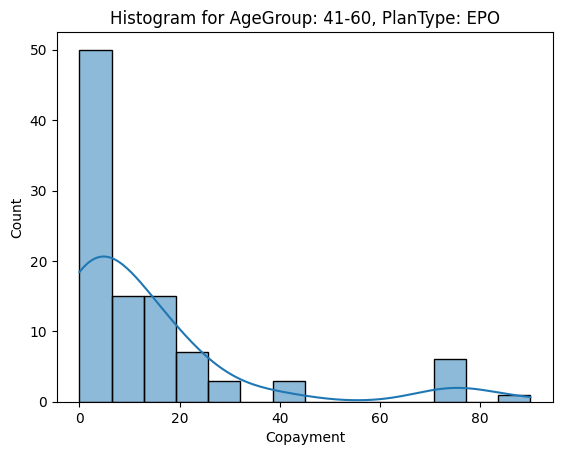

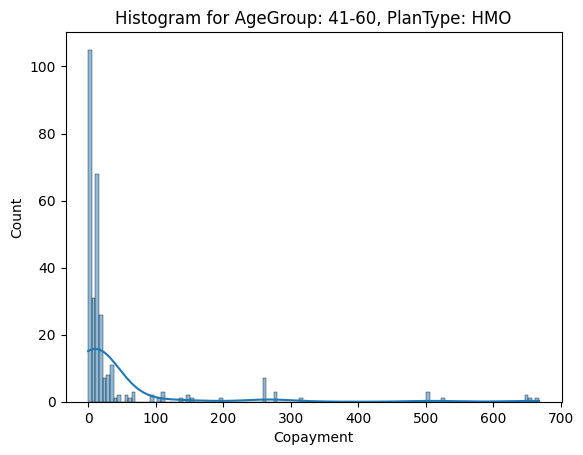

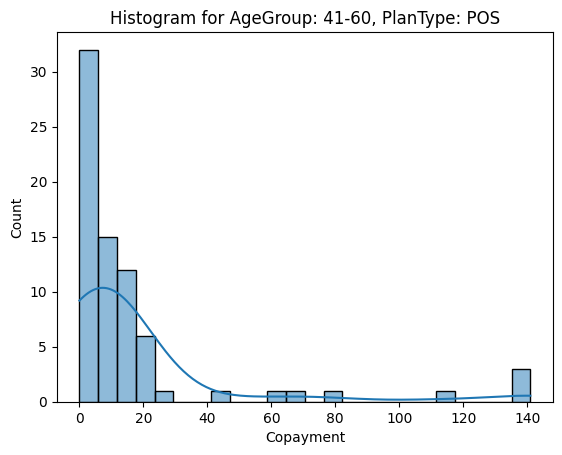

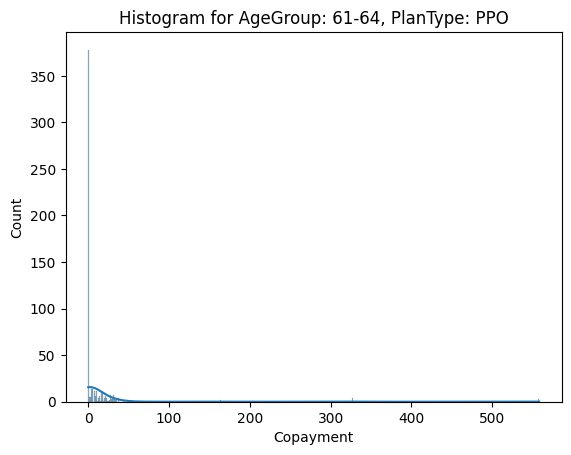

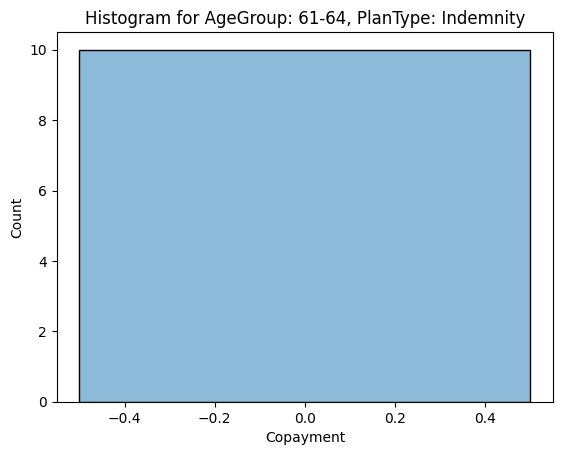

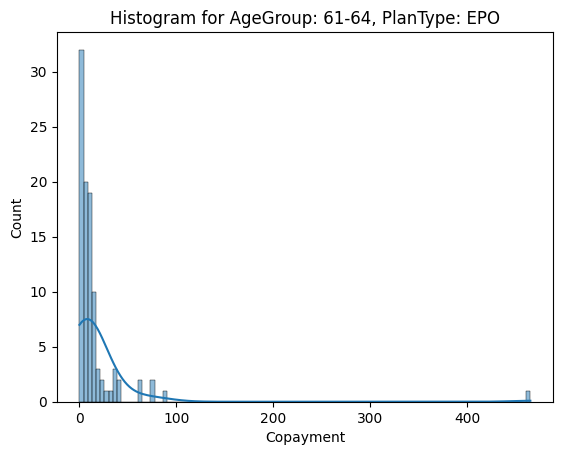

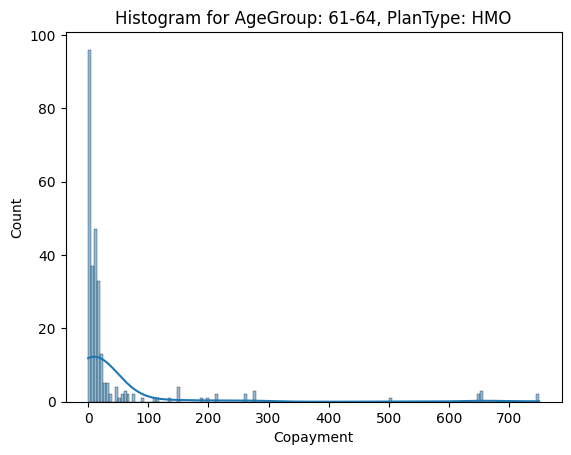

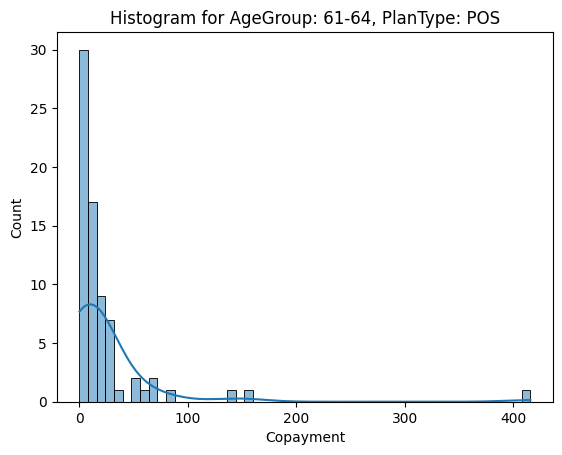

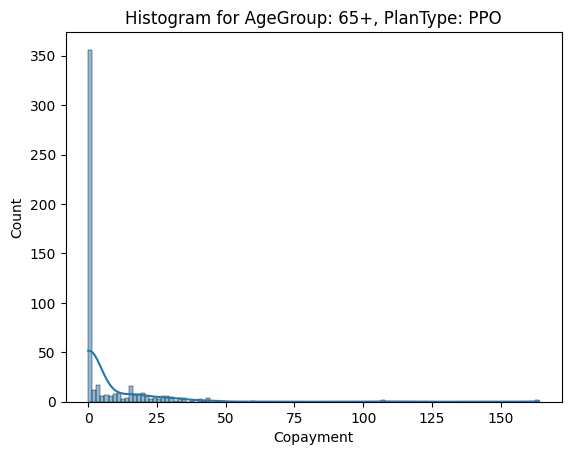

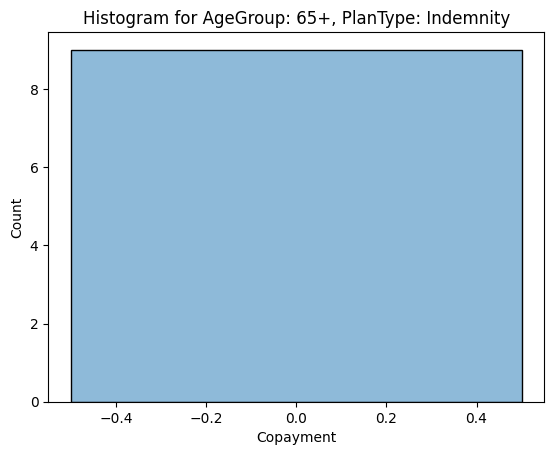

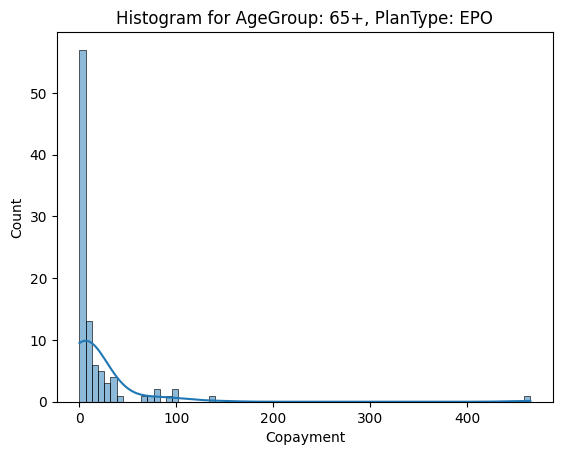

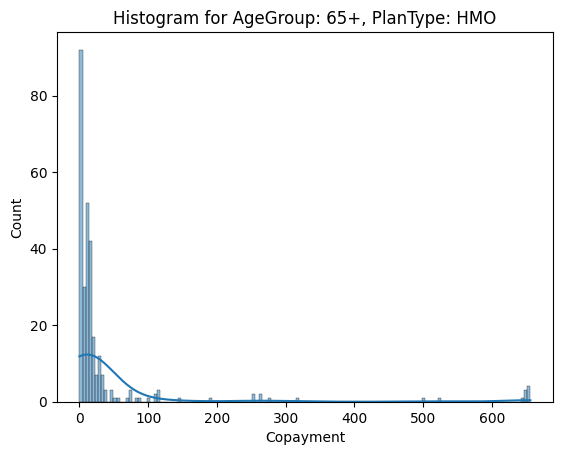

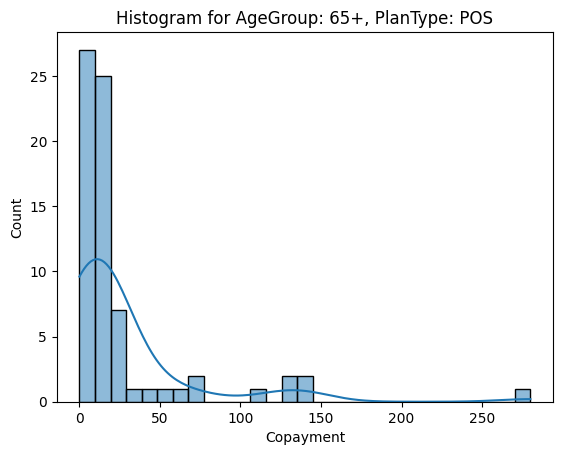

In [3]:
# Load the dataset from Binning-Use.ipynb
df = pd.read_csv('final_binning.csv')

# Show basic information
print(df.head())

# 1. Check the distribution of data (Normality)
# We will check normality for each age group and plan type (PlanType)

# Select the column you want to test
age_groups = df['AgeGroup'].unique()  # AgeGroup
plan_types = df['PlanType'].unique()  # PlanType

# 1.1 Draw a histogram for checking dispersion
for age in age_groups:
    for plan in plan_types:
        subset = df[(df['AgeGroup'] == age) & (df['PlanType'] == plan)]
        sns.histplot(subset['Copayment'], kde=True)
        plt.title(f'Histogram for AgeGroup: {age}, PlanType: {plan}')
        plt.show()

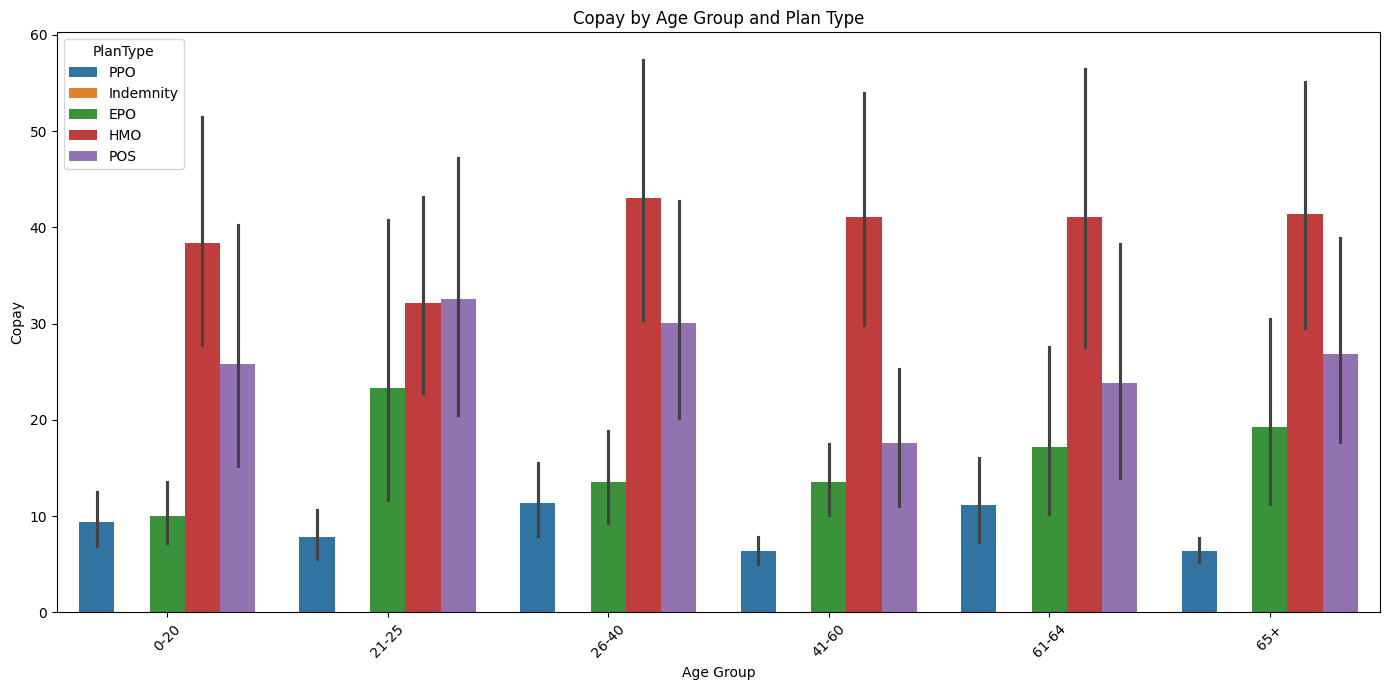

In [4]:
# 1.2 Barplot
df = pd.read_csv('final_binning.csv')

plt.figure(figsize=(14, 7))
sns.barplot(x='AgeGroup', y='Copayment', hue='PlanType', data=df)
plt.xlabel('Age Group')
plt.ylabel('Copay')
plt.title('Copay by Age Group and Plan Type')
plt.legend(title='PlanType')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [24]:
# 1.3 Dispersion was tested by Shapiro-Wilk test (for normality)
# Initialize an empty list to store the summary
summary = []

# Loop through each combination of AgeGroup and PlanType
for age in age_groups:
    for plan in plan_types:
        subset = df[(df['AgeGroup'] == age) & (df['PlanType'] == plan)]
        
        # Apply Shapiro-Wilk Test for normality
        stat, p_value = stats.shapiro(subset['Copayment'])
        
        # Categorize the result based on the p-value
        if p_value > 0.05:
            normality_status = "Approximately Normal"
        else:
            normality_status = "Not Normal"
        
        # Append the result to the summary list
        summary.append({
            'AgeGroup': age,
            'PlanType': plan,
            'Shapiro-Wilk p-value': p_value,
            'Normality Status': normality_status
        })

# Convert the summary list into a DataFrame
summary_df = pd.DataFrame(summary)

# Display the summary table
print(summary_df)

   AgeGroup   PlanType  Shapiro-Wilk p-value      Normality Status
0      0-20        PPO          1.438715e-41            Not Normal
1      0-20  Indemnity          1.000000e+00  Approximately Normal
2      0-20        EPO          2.081744e-17            Not Normal
3      0-20        HMO          6.437718e-29            Not Normal
4      0-20        POS          1.489625e-15            Not Normal
5     21-25        PPO          6.106731e-43            Not Normal
6     21-25  Indemnity          1.000000e+00  Approximately Normal
7     21-25        EPO          1.938971e-18            Not Normal
8     21-25        HMO          4.692742e-30            Not Normal
9     21-25        POS          3.484215e-14            Not Normal
10    26-40        PPO          2.798073e-42            Not Normal
11    26-40  Indemnity          1.000000e+00  Approximately Normal
12    26-40        EPO          2.603503e-14            Not Normal
13    26-40        HMO          1.722589e-30            Not No

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [6]:
# 2. Check equality of variances (Homogeneity of Variance).
# Use Levene's Test to check equality of variances.
# This example uses Copayment as the test variable
copayment_values = [df[df['AgeGroup'] == age]['Copayment'].values for age in age_groups]

# Levene's Test for equal variances was performed.
stat, p_value = levene(*copayment_values)
print(f"Levene's Test for Homogeneity of Variance, p-value: {p_value}")
if p_value > 0.05:
    print("The variances are homogenous.")
else:
    print("The variances are not homogenous.")


Levene's Test for Homogeneity of Variance, p-value: 0.6687677036044586
The variances are homogenous.


In [7]:
# 3. Check the nature of the data (Numerical Data)
# Verify that 'Copayment' is a numeric variable.
if pd.api.types.is_numeric_dtype(df['Copayment']):
    print("The 'Copayment' column contains numerical data.")
else:
    print("The 'Copayment' column does not contain numerical data.")

The 'Copayment' column contains numerical data.


### What to do if data is not normally distributed?
### 1. Tranform data by
- log10: good for data are positive
- Positively Skewed Data: Log10 works well when the data has a long tail to the right (large positive values).
- Non-Negative Values: Logarithms are undefined for zero or negative values. You may need to handle these cases explicitly.
#### Step
- Check for zero or negative values.
- Handle Non-Positive Values 

In [9]:
df['log10_transformed'] = df['Copayment'].apply(lambda x: np.log10(x + 1))

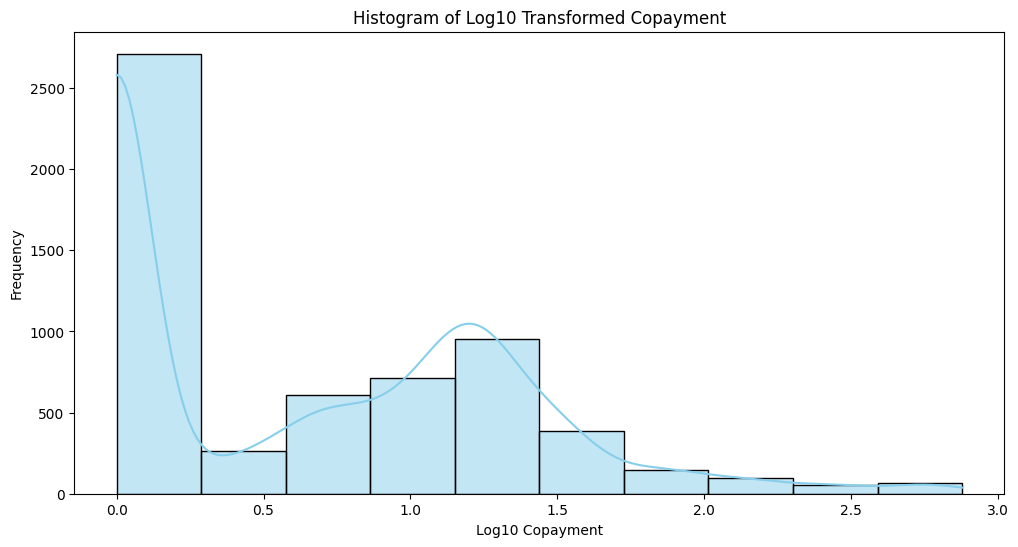

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(df['log10_transformed'], kde=True, bins=10, color='skyblue')
plt.title('Histogram of Log10 Transformed Copayment')
plt.xlabel('Log10 Copayment')
plt.ylabel('Frequency')
plt.show()

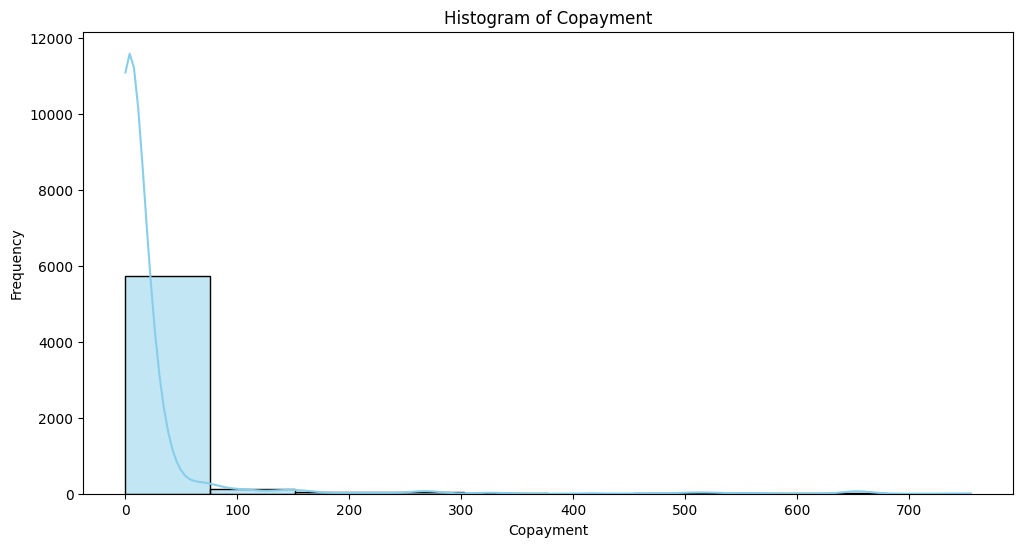

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Copayment'], kde=True, bins=10, color='skyblue')
plt.title('Histogram of Copayment')
plt.xlabel('Copayment')
plt.ylabel('Frequency')
plt.show()

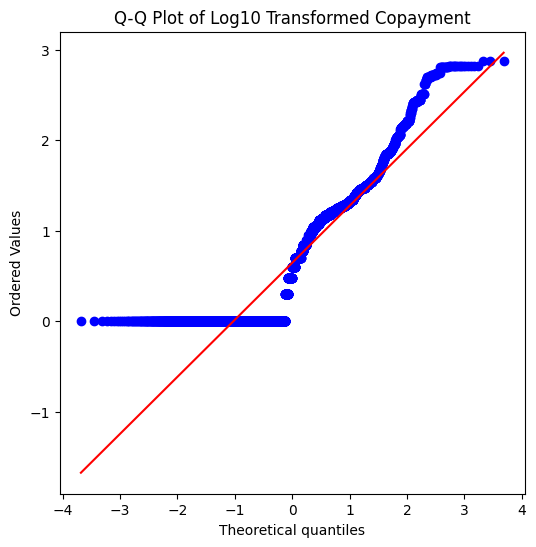

In [12]:
# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(df['log10_transformed'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log10 Transformed Copayment')
plt.show()

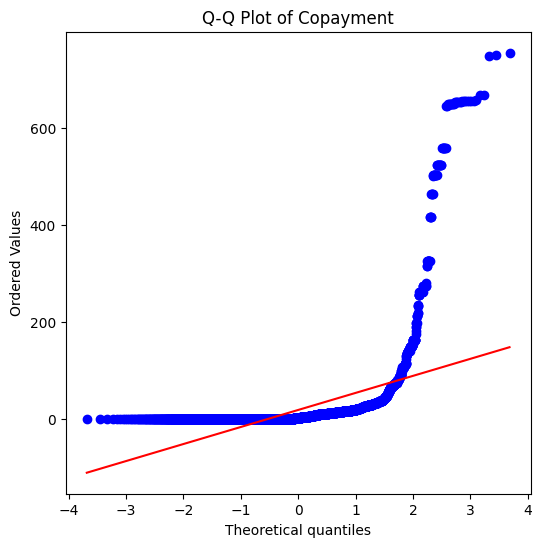

In [25]:
# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(df['Copayment'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Copayment')
plt.show()

### TWO-Way ANOVA test by pingouin library


In [28]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [47]:
import pingouin as pg

# Test Two-Way ANOVA by pingouin
anova_result = pg.anova(dv='Copayment', between=['AgeGroup', 'PlanType'], data=df, detailed=True)
anova_log10_result = pg.anova(dv='log10_transformed', between=['AgeGroup', 'PlanType'], data=df, detailed=True)

print(anova_result)
#p-unc: p-value
#F: F statistic
#np2: R-squared
# p-unc = p-value
# if p-value < alpha value (0.05) => Reject H0
# if p-value > alpha value (0.05) => Fail to reject H0


                Source            SS      DF             MS          F  \
0             AgeGroup  1.409660e+04     5.0    2819.319590   0.641641   
1             PlanType  1.105484e+06     4.0  276371.003490  62.898461   
2  AgeGroup * PlanType  4.145530e+04    20.0    2072.764935   0.471734   
3             Residual  2.623172e+07  5970.0    4393.923139        NaN   

          p-unc       np2  
0  6.679309e-01  0.000537  
1  3.734739e-52  0.040439  
2  9.772073e-01  0.001578  
3           NaN       NaN  


### Summary Copayment
- Age group: 0.6679309 (6.679309e-01) > 0.05 => Fail to reject H0
- Plan type: 0.000...3734739 (3.734739e-52) < 0.05 => Reject H0
- Age group & Plantype: 0.531881 (5.318810e-01) > 0.05 => Fail to reject H0
- These results indicate that **Plan Type** is the only factor with a statistically significant effect on copayment


In [42]:
print(anova_log10_result)

                Source           SS      DF          MS           F  \
0             AgeGroup     2.453491     5.0    0.490698    1.254840   
1             PlanType   497.584129     4.0  124.396032  318.112249   
2  AgeGroup * PlanType     7.369993    20.0    0.368500    0.942347   
3             Residual  2334.535417  5970.0    0.391044         NaN   

           p-unc       np2  
0   2.806010e-01  0.001050  
1  1.761368e-248  0.175693  
2   5.318810e-01  0.003147  
3            NaN       NaN  


### Summary Log10_Copayment
- Age group: 0.280601 (2.806010e-01) > 0.05 => Fail to reject H0
- Plan type: 0.000...1761368 (1.761368e-248) < 0.05 => Reject H0
- Age group & Plantype: 0.531881 (5.318810e-01) > 0.05 => Fail to reject H0
- These results indicate that **Plan Type** is the only factor with a statistically significant effect on copayment
